In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

font = {'size'   : 12}

plt.rc('font', **font)

## Read Files

In [3]:
# df = pd.read_csv('Twitter_data/Data/covid_data_FULL.csv')
df = pd.read_csv('Data/covid_data_reopen.csv')

# df = df.head(2000)
# df.info()

In [4]:
# df.head()

## TextBlob Sentiment details 

-- **Polarity:**  How positive or negative a word is. -1 is very negative. +1 is very positive. 0 is neutral.

-- **Subjectivity:** How subjective, or opinionated a word is. 0 is fact. +1 is very much opinion (public opinion).

In [5]:
## Get the polarity and subjectivity and create columns

df['polarity'] = df['sentiment'].apply(lambda x: round(float(x.split('polarity=')[1].split(',')[0]),2))
df['subjectivity'] = df['sentiment'].apply(lambda x: round(float(x.split('subjectivity=')[1].split(')')[0]),2))
# df.head(10)

## Create sentiment_type column

In [6]:
df['sentiment_type'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
df['subjectivity_type'] = df['subjectivity'].apply(lambda x: 'Opinion' if x > 0 else 'Fact')
# df.head()

In [7]:
def getDate(date_data):
    temp = date_data.split(" ")
    month = temp[1]
    day = temp[2]
    year = temp[5]
    date = month + " " + str(day) + " " + str(year)
    date = datetime.datetime.strptime(date, '%b %d %Y')
    return date


In [8]:
## Get the date

df['date'] = df['created_at'].apply(lambda x: getDate(x))
# df.head()

In [9]:
# df['sentiment_type_count'] = df['date'].groupby(df['sentiment_type']).transform('count')
# df['subjectivity_type_count'] = df['date'].groupby(df['subjectivity_type']).transform('count')
df['sentiment_type_count'] = df['sentiment_type'].groupby(df['date']).transform('count')
df['subjectivity_type_count'] = df['subjectivity_type'].groupby(df['date']).transform('count')
# df.head()

In [10]:
df_sentiment_count = df.sentiment_type.value_counts().rename_axis('types').reset_index(name='counts')
df_sentiment_count

,types,counts
0,Neutral,22479
1,Positive,17400
2,Negative,4307


In [11]:
df_sentiment_count['percentage'] = df_sentiment_count['counts'].apply(lambda x: round(x * 100 / sum(df_sentiment_count['counts']), 2)) 
df_sentiment_count

,types,counts,percentage
0,Neutral,22479,50.87
1,Positive,17400,39.38
2,Negative,4307,9.75


## Barplot for Sentiment type

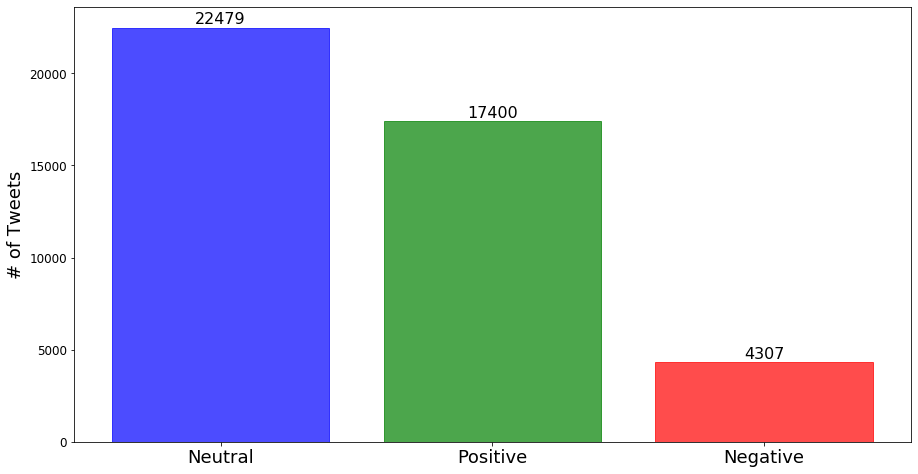

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
barlist = plt.bar(df_sentiment_count['types'], df_sentiment_count['counts'], color="dodgerblue", width=0.8)
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[0].set_alpha(0.7)
barlist[1].set_alpha(0.7)
barlist[2].set_alpha(0.7)
plt.xlabel('', fontsize=18)
plt.ylabel('# of Tweets', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=18)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+200, df_sentiment_count['counts'][i],
            ha="center", fontsize=16)
# plt.savefig('plots/barplot_sentiment_type.png')
plt.show()

## Barplot for Sentiment type Percentages

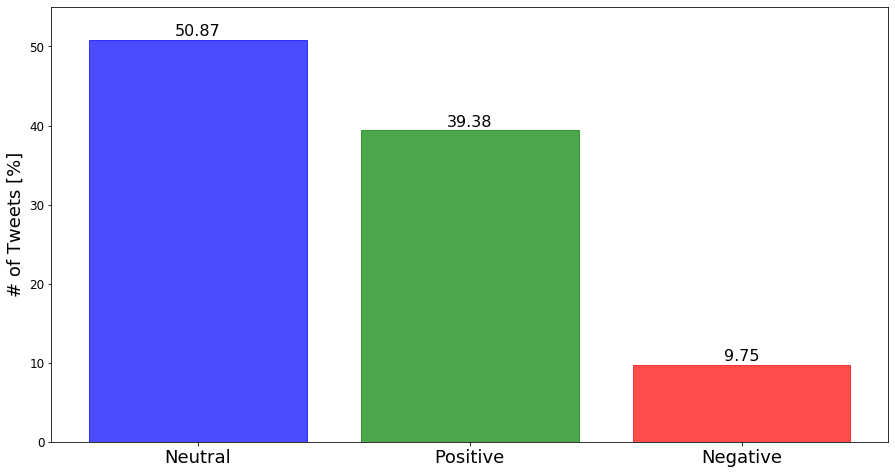

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
barlist = plt.bar(df_sentiment_count['types'], df_sentiment_count['percentage'], color="dodgerblue", width=0.8)
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[0].set_alpha(0.7)
barlist[1].set_alpha(0.7)
barlist[2].set_alpha(0.7)
plt.ylim(0,55)
plt.xlabel('', fontsize=18)
plt.ylabel('# of Tweets [%]', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=18)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+0.5, df_sentiment_count['percentage'][i],
            ha="center", fontsize=16)
# plt.savefig('plots/barplot_sentiment_type_percentage.png')
plt.show()

## For Subjectivity type

In [14]:
df_subjectivity_count = df.subjectivity_type.value_counts().rename_axis('types').reset_index(name='counts')
df_subjectivity_count

,types,counts
0,Opinion,31301
1,Fact,12885


In [15]:
df_subjectivity_count['percentage'] = df_subjectivity_count['counts'].apply(lambda x: round(x * 100 / sum(df_subjectivity_count['counts']), 2)) 
df_subjectivity_count

,types,counts,percentage
0,Opinion,31301,70.84
1,Fact,12885,29.16


### (1) Barplot for Subjectivity

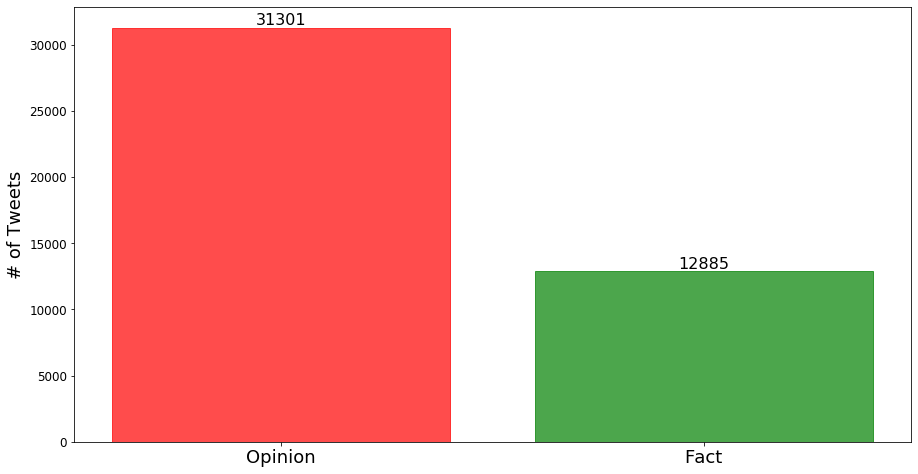

In [16]:

fig, ax = plt.subplots(figsize=(15,8))
barlist = plt.bar(df_subjectivity_count['types'], df_subjectivity_count['counts'], color="dodgerblue", width=0.8)
barlist[0].set_color('red')
barlist[1].set_color('green')
barlist[0].set_alpha(0.7)
barlist[1].set_alpha(0.7)
plt.xlabel('', fontsize=18)
plt.ylabel('# of Tweets', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=18)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+200, df_subjectivity_count['counts'][i],
            ha="center", fontsize=16)
# plt.savefig('plots/barplot_subjectivity_type.png')
plt.show()

### (2) Barplot for Subjectivity Percentages

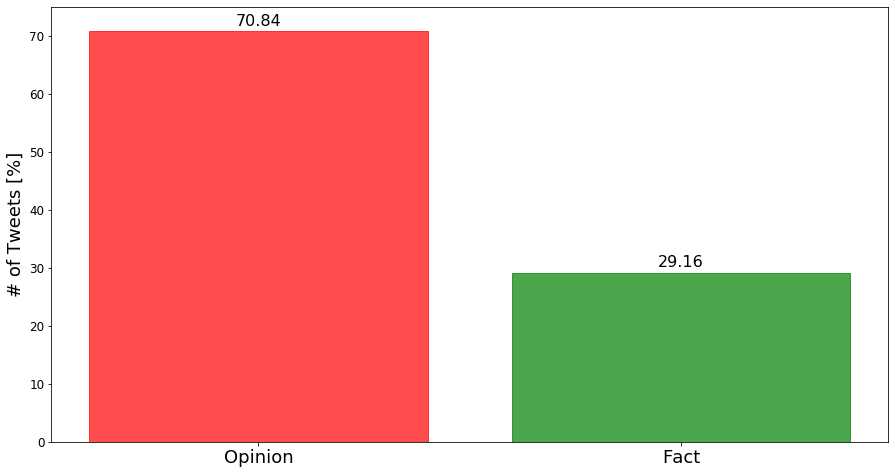

In [17]:

fig, ax = plt.subplots(figsize=(15,8))
barlist = plt.bar(df_subjectivity_count['types'], df_subjectivity_count['percentage'], color="dodgerblue", width=0.8,
       label = df_subjectivity_count['percentage'])

barlist[0].set_color('red')
barlist[1].set_color('green')
barlist[0].set_alpha(0.7)
barlist[1].set_alpha(0.7)
plt.ylim(0,75)
plt.xlabel('', fontsize=18)
plt.ylabel('# of Tweets [%]', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=18)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+1, df_subjectivity_count['percentage'][i],
            ha="center", fontsize=16)
    
# plt.savefig('plots/barplot_subjectivity_type_percentage.png')
plt.show()

## Daily Sentiment Analysis


In [18]:
temp = df[['sentiment_type', 'date']]
df_daily_sentiment = temp.groupby(['date', 'sentiment_type'])['sentiment_type'].count().reset_index(name='counts')
# df_daily_sentiment

## Line Plot of Daily Sentiment

/Users/emtiaz/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


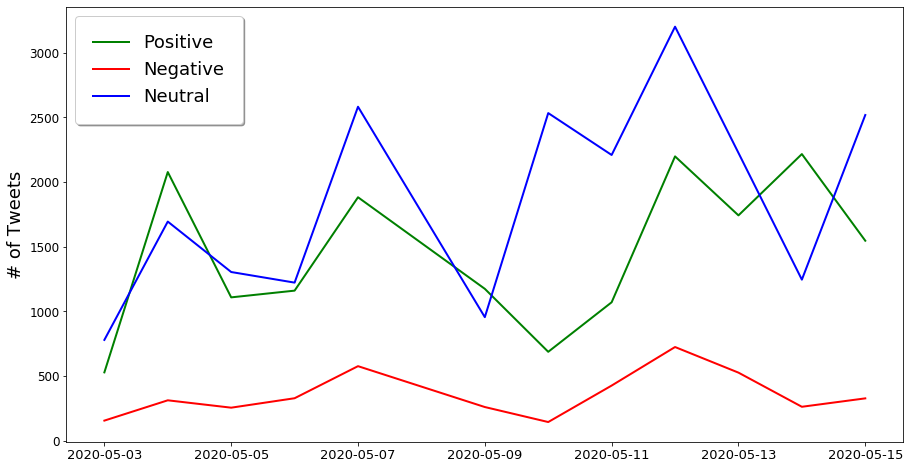

In [19]:
positive = df_daily_sentiment[df_daily_sentiment['sentiment_type']=='Positive']
negative = df_daily_sentiment[df_daily_sentiment['sentiment_type']=='Negative']
neutral = df_daily_sentiment[df_daily_sentiment['sentiment_type']=='Neutral']



fig, ax = plt.subplots(figsize=(15,8))

plt.plot(positive['date'], positive['counts'], color='green', linewidth = 2,  label = 'Positive')
plt.plot(negative['date'], negative['counts'], color='red', linewidth = 2,  label = 'Negative')
plt.plot(neutral['date'], neutral['counts'], color='blue', linewidth = 2,  label = 'Neutral')
plt.xlabel('', fontsize=18)
plt.ylabel('# of Tweets', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=13)
plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
# plt.savefig('plots/lineplot_sentiment_type.png')
plt.show()

## Daily Subjectivity Analysis

In [20]:
temp = df[['subjectivity_type', 'date']]
df_daily_subjectivity = temp.groupby(['date', 'subjectivity_type'])['subjectivity_type'].count().reset_index(name='counts')
# df_daily_subjectivity

## Line Plot of Daily Subjectivity

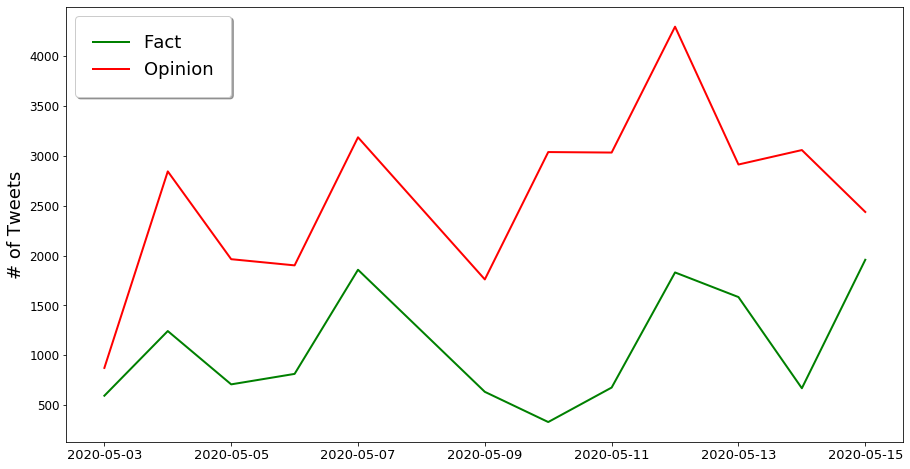

In [21]:
fact = df_daily_subjectivity[df_daily_subjectivity['subjectivity_type']=='Fact']
opinion = df_daily_subjectivity[df_daily_subjectivity['subjectivity_type']=='Opinion']



fig, ax = plt.subplots(figsize=(15,8))

plt.plot(fact['date'], fact['counts'], color='green', linewidth = 2,  label = 'Fact')
plt.plot(opinion['date'], opinion['counts'], color='red', linewidth = 2,  label = 'Opinion')
plt.xlabel('', fontsize=18)
plt.ylabel('# of Tweets', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=13)
plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
# plt.savefig('plots/lineplot_subjectivity_type.png')
plt.show()